In [ ]:
# Define entities and relationships
entities = {
    "patient": {
        "type": "individual",
        "attributes": {
            "age": {"type": "integer", "range": [20, 80]},
            "gender": {"type": "categorical", "values": ["male", "female"]},
            "height": {"type": "integer", "unit": "cm"},
            "weight": {"type": "integer", "unit": "kg"},
            "blood_pressure": {"type": "integer", "unit": "mmHg"},
            "cholesterol": {"type": "integer", "unit": "mg/dL"},
            "glucose": {"type": "integer", "unit": "mg/dL"},
            "smoking": {"type": "categorical", "values": ["current", "former", "never"]},
            "alcohol": {"type": "categorical", "values": ["yes", "no"]},
            "physical_activity": {"type": "integer", "unit": "minutes"}
        }
    },
    "cardiovascular_disease": {
        "type": "medical condition",
        "categories": ["present", "absent"]
    },
    "risk_factor": {
        "type": "medical condition/habit",
        "categorical_examples": ["smoking", "alcohol", "physical_activity"],
        "threshold_examples": {
            "high_blood_pressure": {"threshold": 140},
            "high_cholesterol": {"threshold": 200},
            "high_glucose": {"threshold": 126}
        }
    }
}

relationships = {
    "patient": {
        "has": ["risk_factor"],
        "can_have": ["cardiovascular_disease"]
    },
    "risk_factor": {
        "increases_risk_of": ["cardiovascular_disease"],
        "related_to": {"high_blood_pressure": ["high_cholesterol", "high_glucose"]}
    }
}


In [ ]:
# Function to check if a patient is at risk of cardiovascular disease
def check_cardiovascular_disease_risk(patient_data):
    risk_factors = patient_data["risk_factor"]
    risk_explanation = []  # List to store explanations for each risk factor

    # Checking for high blood pressure
    if "high_blood_pressure" in risk_factors:
        if patient_data["blood_pressure"] >= 140:
            risk_explanation.append("High blood pressure (>=140 mmHg)")

    # Checking for high cholesterol
    if "high_cholesterol" in risk_factors:
        if patient_data["cholesterol"] >= 200:
            risk_explanation.append("High cholesterol (>=200 mg/dL)")

    # Checking for high glucose
    if "high_glucose" in risk_factors:
        if patient_data["glucose"] >= 126:
            risk_explanation.append("High glucose (>=126 mg/dL)")

    # Checking for smoking habit
    if patient_data["smoking"] == "current":
        risk_explanation.append("Current smoking")

    # Checking for alcohol consumption
    if patient_data["alcohol"] == "yes":
        risk_explanation.append("Alcohol consumption")

    # Checking for low physical activity
    if patient_data["physical_activity"] < 30:  # Assuming less than 30 minutes as low physical activity
        risk_explanation.append("Low physical activity (<30 minutes/day)")

    # If there are any risk factors, the patient is considered at risk
    if risk_explanation:
        print("The patient is at risk of cardiovascular disease.")
        print("Risk Factors:")
        for factor in risk_explanation:
            print("- " + factor)
    else:
        print("The patient is not at risk of cardiovascular disease.")

# Sample patient data
sample_patient = {
    "age": 55,
    "gender": "male",
    "height": 175,
    "weight": 80,
    "blood_pressure": 150,
    "cholesterol": 220,
    "glucose": 130,
    "smoking": "current",
    "alcohol": "yes",
    "physical_activity": 20,  # Minutes of physical activity per day
    "risk_factor": ["high_blood_pressure", "high_cholesterol", "high_glucose", "smoking", "alcohol"]
}

# Check if the sample patient is at risk of cardiovascular disease
check_cardiovascular_disease_risk(sample_patient)


The patient is at risk of cardiovascular disease.
Risk Factors:
- High blood pressure (>=140 mmHg)
- High cholesterol (>=200 mg/dL)
- High glucose (>=126 mg/dL)
- Current smoking
- Alcohol consumption
- Low physical activity (<30 minutes/day)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/CVD_datasets")
!ls

cardio_test.csv  cardio_train.csv


In [ ]:
#importing required libraries

import os
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
import torch
import sklearn
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import torch.functional as F
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
data = pd.read_csv("cardio_train.csv")

In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data.shape

(70000, 13)

In [ ]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
data.drop('id', inplace=True, axis=1)
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.nunique()

age            8076
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

In [ ]:
data.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [ ]:
data['gender'] = data.gender.replace({1: "Male", 2: "Female"})
data['cholesterol'] = data.cholesterol.replace({1: "normal", 2:"above normal", 3: "well above normal"})
data['gluc'] = data.gluc.replace({1: "normal", 2:"above normal", 3: "well above normal"})
data['smoke'] = data.smoke.replace({1: "Yes", 0: "No"})
data['alco'] = data.alco.replace({1: "Yes", 0: "No"})
data['active'] = data.active.replace({1: "Yes", 0: "No"})
data['cardio'] = data.cardio.replace({1: "Present", 0: "Absent"})

In [ ]:
# define continuous variable & plot
continous_features = ['age','height','weight','ap_hi', 'ap_lo']
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(data[continous_features])

For the feature age, No of Outliers is 4
For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819
For the feature ap_hi, No of Outliers is 1435
For the feature ap_lo, No of Outliers is 4632


In [ ]:
outliers(data[continous_features], drop = True)

Outliers from age feature removed
Outliers from height feature removed
Outliers from weight feature removed
Outliers from ap_hi feature removed
Outliers from ap_lo feature removed


cardio
Absent     31632
Present    30870
Name: count, dtype: int64


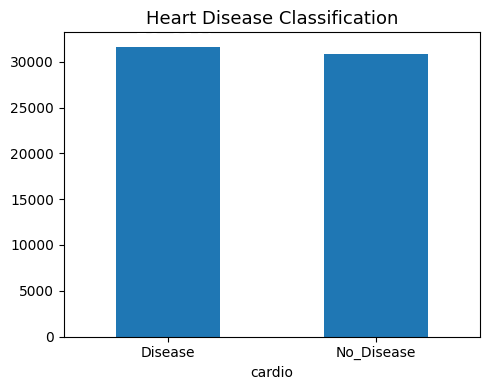

In [ ]:
print(data.cardio.value_counts())

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = data.cardio.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classification", fontsize = 13)
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')

plt.tight_layout()

Text(0.5, 1.0, 'Age Distribution')

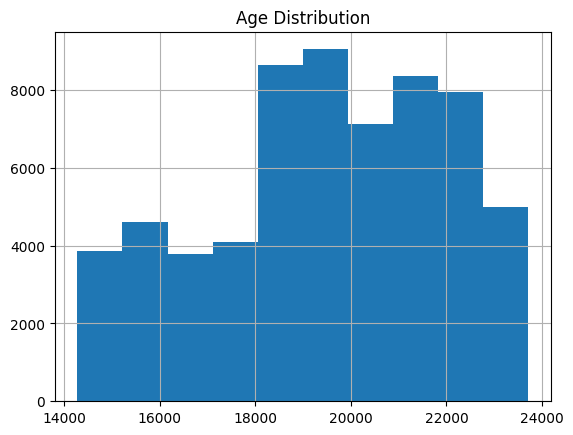

In [ ]:

# print(df.age.value_counts())
data['age'].hist().plot(kind='bar')
plt.title('Age Distribution')

age
21892    30
19733    29
19741    29
18253    29
18236    28
19709    27
21147    27
21927    27
21159    27
20370    27
18184    27
19657    27
19655    27
20376    26
20442    26
21225    26
20448    26
20347    26
20490    26
21222    26
Name: count, dtype: int64


<ipython-input-20-c5ebbefdb01b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.age.value_counts()[:20].index, y = data.age.value_counts()[:20].values,palette='Set2')


Text(0, 0.5, 'Age distribution')

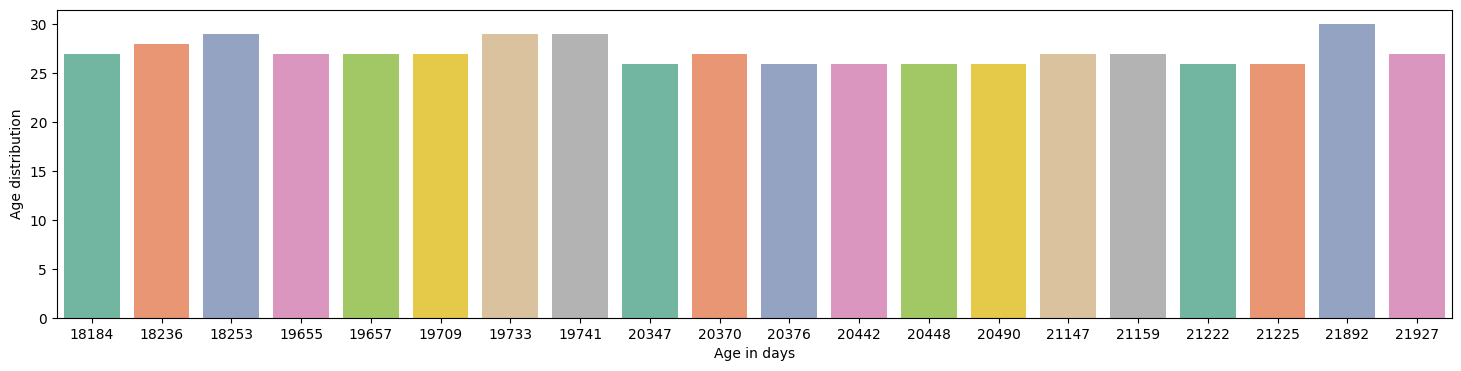

In [ ]:
# Analyze distribution in age in range 500
print(data.age.value_counts()[:20])
plt.rcParams['figure.figsize'] = [18, 4]
sns.barplot(x=data.age.value_counts()[:20].index, y = data.age.value_counts()[:20].values,palette='Set2')
plt.xlabel('Age in days')
plt.ylabel('Age distribution')

In [ ]:
# to know yougest and oldest patient
print("Age in years (approx.):")
print("Minimum age: ", min(data.age)/365)
print("Maximum age: ",max(data.age)/365)
print("Mean age: ",data.age.mean()/365)

Age in years (approx.):
Minimum age:  39.12876712328767
Maximum age:  64.96712328767123
Mean age:  53.40753523284515


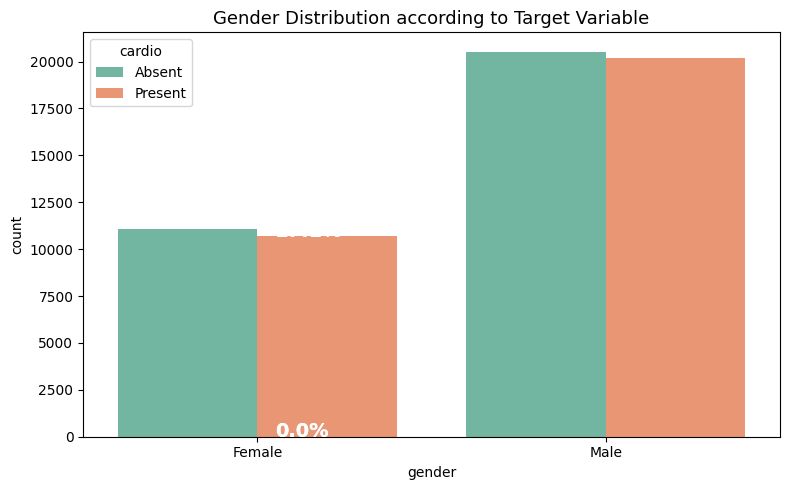

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
name = data['gender']
ax = sns.countplot(x='gender', hue='cardio', data=data, palette='Set2')
ax.set_title("Gender Distribution according to Target Variable", fontsize = 13)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
plt.tight_layout()

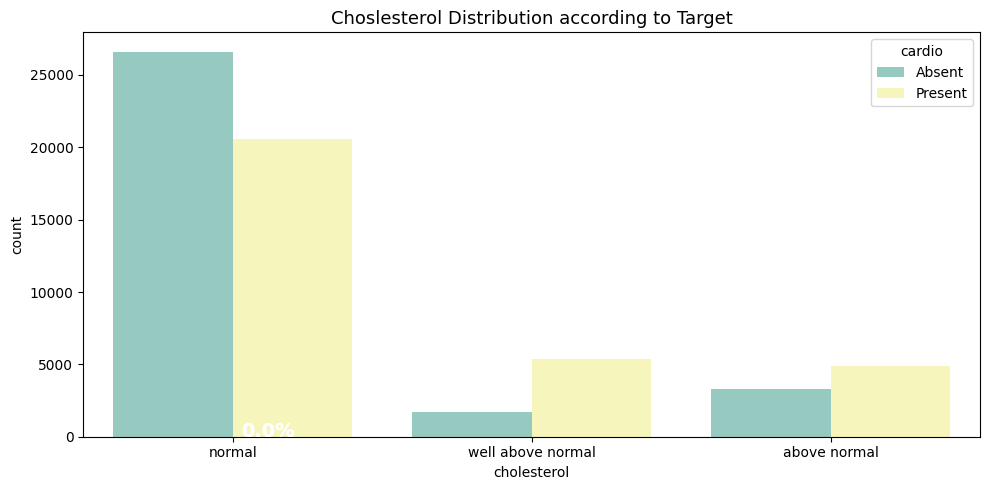

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = data['cholesterol']
ax = sns.countplot(x='cholesterol', hue='cardio', data=data, palette='Set3')
ax.set_title("Choslesterol Distribution according to Target", fontsize = 13)
#ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
plt.tight_layout()

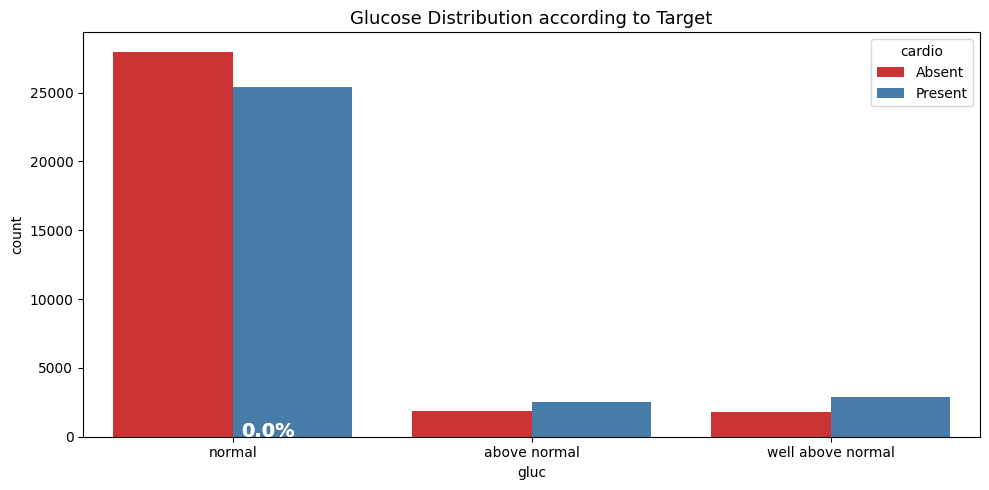

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
name = data['gluc']
ax = sns.countplot(x='gluc', hue='cardio', data=data, palette='Set1')
ax.set_title("Glucose Distribution according to Target", fontsize = 13)
#ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
plt.tight_layout()

Text(0.5, 1.0, 'Height Distribution')

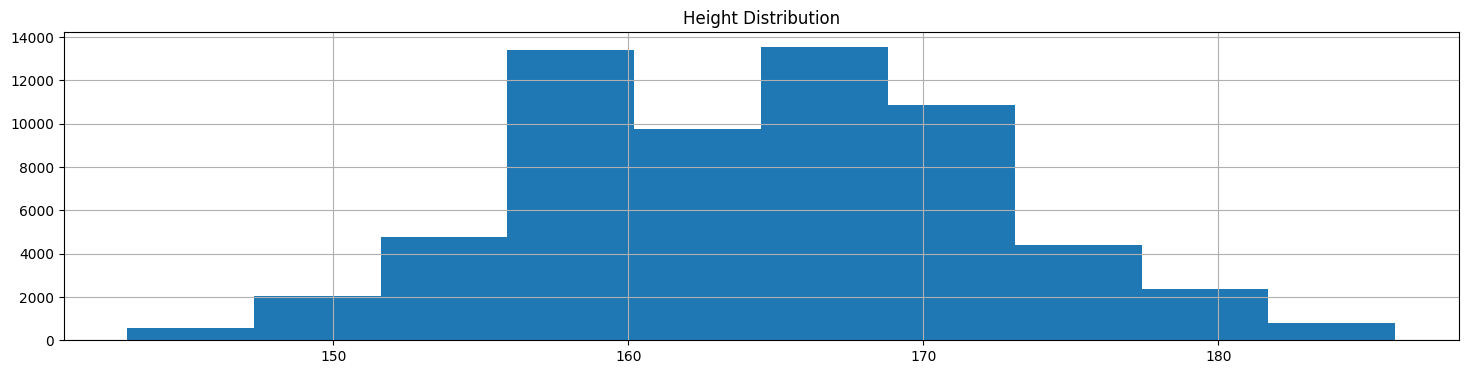

In [ ]:
# height
data['height'].hist().plot(kind='bar')
plt.title('Height Distribution')

Text(0.5, 1.0, 'Weight Distribution')

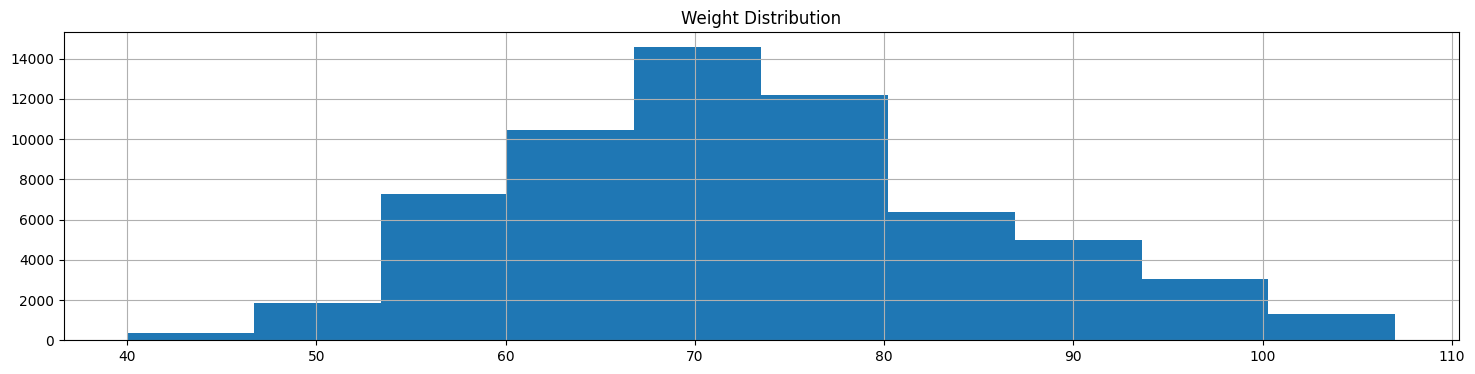

In [ ]:
# weight
data['weight'].hist().plot(kind='bar')
plt.title('Weight Distribution')

In [ ]:
df = pd.read_csv("cardio_train.csv")
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

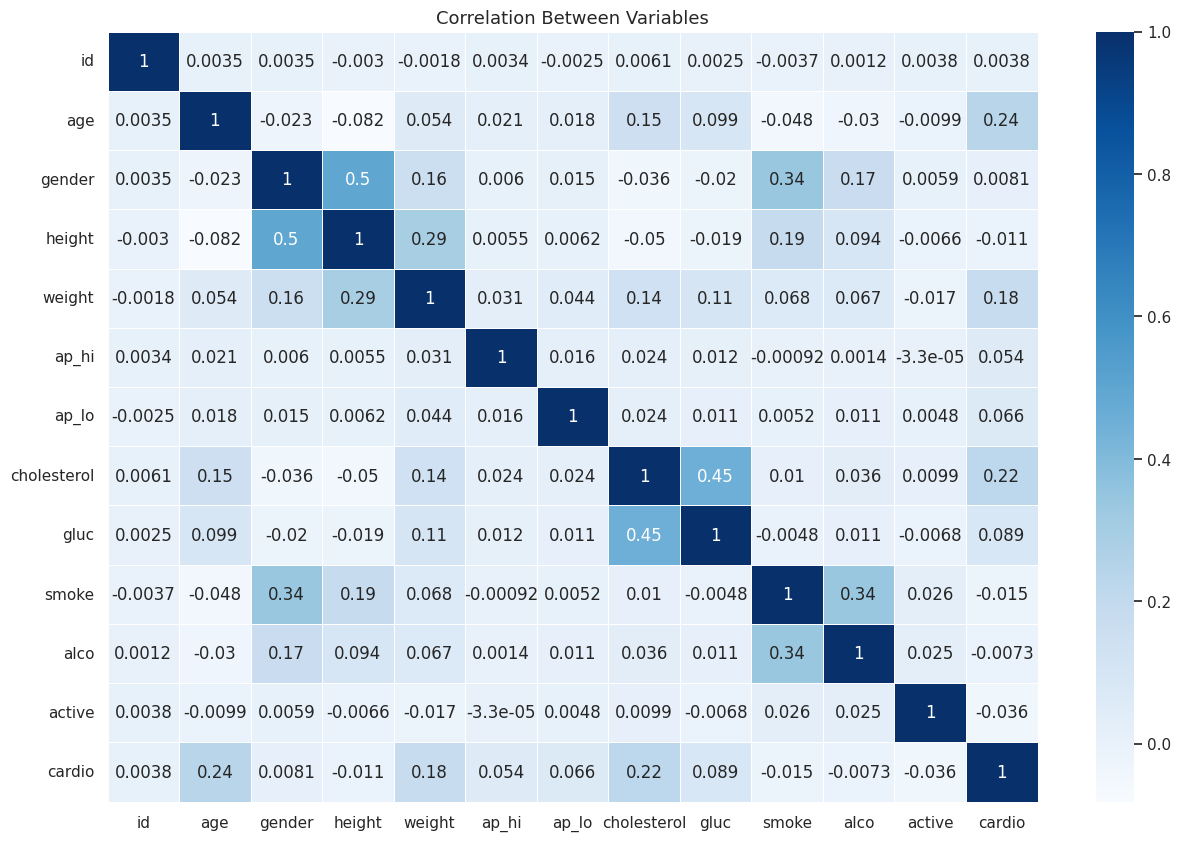

In [ ]:
sns.set(style="white")
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Correlation Between Variables', fontsize = 13)
plt.show()

In [ ]:
scaled_values = {}

In [ ]:
#scaling
for x in df.columns:

    maxval = max(df[x])
    scaled_values[x] = maxval
    df[x] = df[x]/maxval

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.00000,0.775650,1.0,0.672,0.310,0.006866,0.007273,0.333333,0.333333,0.0,0.0,1.0,0.0
1,0.00001,0.853034,0.5,0.624,0.425,0.008739,0.008182,1.000000,0.333333,0.0,0.0,1.0,1.0
2,0.00002,0.795218,0.5,0.660,0.320,0.008115,0.006364,1.000000,0.333333,0.0,0.0,0.0,1.0
3,0.00003,0.743179,1.0,0.676,0.410,0.009363,0.009091,0.333333,0.333333,0.0,0.0,1.0,1.0
4,0.00004,0.736895,0.5,0.624,0.280,0.006242,0.005455,0.333333,0.333333,0.0,0.0,0.0,0.0


In [ ]:
# starting from index 1 to remove index column
X, y = df[df.columns[1:]].values[:,:-1], df[df.columns[1:]].values[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

In [ ]:
#creating the model object
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',booster ="gbtree",max_depth =6)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
format(accuracy, ".2f")

'0.73'

In [ ]:
ps = precision_score(y_pred,y_test)
rs = recall_score(y_pred, y_test)
f1s = f1_score(y_pred,y_test)
print(f"Precision {ps}\nRecall {rs}\nF1 Score {f1s}")

Precision 0.6874245715664977
Recall 0.764221824686941
F1 Score 0.7237917743233513


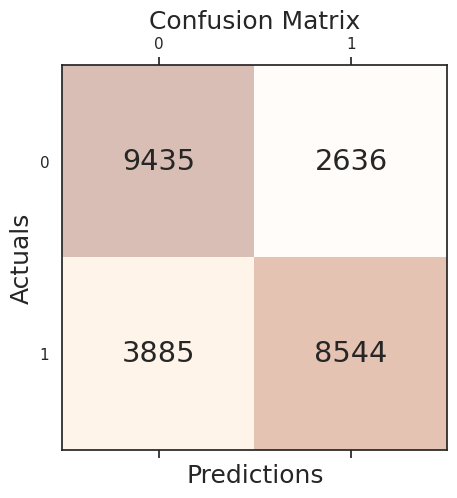

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
feature_importances = model.feature_importances_
